In [5]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns


In [6]:
movies_orig = pd.read_csv("movies.csv")
ratings_orig = pd.read_csv("ratings.csv")


In [7]:
# Get the ratings of the first 200 users and drop the rest
ratings = ratings_orig[ratings_orig['userId']<=200]

# Get the first 200 movies
movies = movies_orig[movies_orig['movieId']<=200]

# Uncomment to use all movies rated by the first 200 users for better results
# movie_200= ratings['movieId'].unique()
# movies = movies_orig[movies_orig['movieId'].isin(movie_200)]

# Merge the movies and ratings in one dataframe 
df = pd.merge(ratings, movies, on="movieId")

# Standardize the ratingsto range from 0-1
df['rating'] = (df['rating'] - df['rating'].min()) / (df['rating'].max() - df['rating'].min())
df.head()


,userId,movieId,rating,timestamp,title,genres
0,1,1,0.777778,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,0.777778,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,0.888889,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,0.444444,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,0.888889,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


Movie ID: 110 Movie Title: Braveheart (1995)
Movie ID: 150 Movie Title: Apollo 13 (1995)
Movie ID: 50 Movie Title: Usual Suspects, The (1995)
Movie ID: 104 Movie Title: Happy Gilmore (1996)
Movie ID: 165 Movie Title: Die Hard: With a Vengeance (1995)
Movie ID: 47 Movie Title: Seven (a.k.a. Se7en) (1995)
Movie ID: 34 Movie Title: Babe (1995)
Movie ID: 111 Movie Title: Taxi Driver (1976)
Movie ID: 32 Movie Title: Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
Movie ID: 153 Movie Title: Batman Forever (1995)


<Axes: >

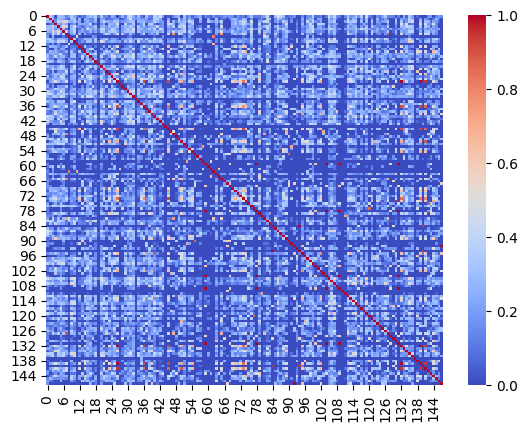

In [8]:
# Pivot the table to get a matrix of ratings for each user and movie
pivot_table = pd.pivot_table(df, values='rating', index='movieId', columns='userId').fillna(0)

# Calculate cosine similarity matrix using pivot table
cosine_sim_matrix = cosine_similarity(pivot_table)

# Convert cosine similarity matrix into dataframe
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=pivot_table.index, columns=pivot_table.index)

# Change n to alter the number of recommendations returned

def get_top_similar_movies(movieId,n=10):
    # Get top 10 similar movies for given movie ID
    similar_movies = cosine_sim_df[movieId].sort_values(ascending=False).iloc[1:n+1]
    
    similar_movies_titles = []
    similar_movies_ids=[]
    # recommended_movie={}
    for movie_id in similar_movies.index:
        similar_movies_titles.append(df[df['movieId']==movie_id]['title'].iloc[0])
        similar_movies_ids.append(movie_id)
    return similar_movies_titles,similar_movies_ids

# Example: get the top 10 similar movies to "Toy Story"

titles,ids= get_top_similar_movies(1)
for i in range(len(titles)):
    print("Movie ID:",ids[i],"Movie Title:",titles[i])
sns.heatmap(cosine_sim_matrix, cmap='coolwarm')